## Exercise Solutions for Support Vector Machines

#### Q1. What is the fundamental idea behind Support Vector Machines?

- The fundamental idea behind Support Vector Machines is to fit the widest possible street between two classes for classification and conversely, fit as many training instances on the street for regression. Since usually datasets are non-linear, hyper-parameters can be set to allow margin violations.

#### Q2. What is a suport vector?

- Support vectors are basically any instances that are located on the street. The decision boundary (widest possible street separating the two classes) is entirely dependent on these support vectors. 

#### Q3. Why is it important to scale the inputs when using SVMs?

- SVMs are sensitive to feature scales. If one feature has a wider range of values than other feature then the decision boundary separating them would be narrow. Once both the features are scaled, a wider decision boundary can be fitted.

#### Q4. Can a SVM classifier output a confidence score when it classifies an instance? What about a probability?

- The distance between the predicted instance and decision boundary can be used as confidence score.
- `sklearn` SVM class can give the output probability by setting `probability=True`.

#### Q5. Should you use the primal or the dual form of the SVM problem to train a model on a training set with millions of instances and hundreds of features?

- All kernel form SVMs can only use dual form, so this only applies to linear SVM.
- For primal form the computational complexity is proportional to number of training instances $m$, while for dual form it is between $m^2$ and $m^3$.
- Hence primal form should be used.

#### Q6. Say you trained an SVM classifier with an RBF kernel. It seems to underfit the training set: should you increase or decrease $\gamma$(gamma)? What about C?

- As gamma is increased the rbf bell shape curve gets narrower. So instances have smaller range of influence.
- If gamma is decreased the rbf bell shape curve gets wider. So instances have larger range of influence, hence the decision boundary ends up smoother.
- Therefore if the model is underfitting $\gamma$ should be increased.


- $C$ controls the marginal violations. 
- Smaller value of $C$ means wider the street and hence more margin violations, and vice-versa.
- Therefore, if the model is underfitting increase $C$.

#### Q7. How should you set the QP parameters (**H, f, A** and **b**) to solve the soft margin linear SVM classifier problem using an off-the-shelf QP solver?

- 

#### Q8. Train a LinearSVC on a linearly separable dataset. Then train an SVC and a SGDClasifier on the same dataset. See if you can get them to produce roughly the same model.

In [14]:
import matplotlib.pyplot as plt
%matplotlib inline

# sklearn
from sklearn import datasets
from sklearn.preprocessing import StandardScaler
from sklearn.svm import LinearSVC
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import accuracy_score

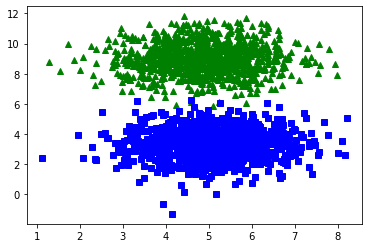

In [46]:
# linearly separable data

X, y = datasets.make_blobs(n_samples=2000, centers=2, n_features=2, center_box=(0, 10))
plt.plot(X[:, 0][y == 0], X[:, 1][y == 0], 'g^')
plt.plot(X[:, 0][y == 1], X[:, 1][y == 1], 'bs')
plt.show()

In [47]:
# train and test
X_train, X_test = X[:400], X[400:]
y_train, y_test = y[:400], y[400:]

In [48]:
# scale data
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [49]:
# define model
svc = LinearSVC(random_state=42)
sgd = SGDClassifier(random_state=42)

# fit model
svc.fit(X_train_scaled, y_train)
sgd.fit(X_train_scaled, y_train)

SGDClassifier(alpha=0.0001, average=False, class_weight=None,
              early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
              l1_ratio=0.15, learning_rate='optimal', loss='hinge',
              max_iter=1000, n_iter_no_change=5, n_jobs=None, penalty='l2',
              power_t=0.5, random_state=42, shuffle=True, tol=0.001,
              validation_fraction=0.1, verbose=0, warm_start=False)

In [50]:
# evaluate
svc_pred = svc.predict(X_test_scaled)
sgd_pred = sgd.predict(X_test_scaled)

In [51]:
# compare
print("SVC intercept: ", svc.intercept_)
print("SGD intercept: ", sgd.intercept_)
print()
print("SVC coefficient: ", svc.coef_)
print("SGD coefficient: ", sgd.coef_)
print()
print("SVC Accuracy Score: ", accuracy_score(y_test, svc_pred))
print("SGD Accuracy Score: ", accuracy_score(y_test, sgd_pred))

SVC intercept:  [-0.37782163]
SGD intercept:  [-0.47690996]

SVC coefficient:  [[ 0.07925374 -2.398849  ]]
SGD coefficient:  [[  0.81565331 -15.94351719]]

SVC Accuracy Score:  0.998125
SGD Accuracy Score:  0.9975


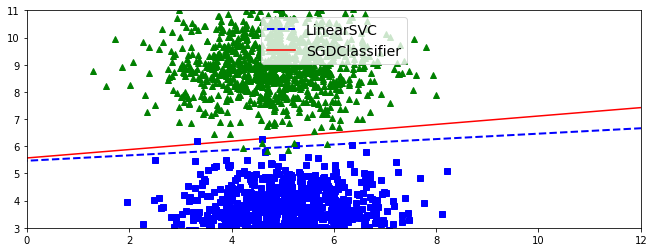

In [53]:
# Compute the slope and bias of each decision boundary
w2 = -svc.coef_[0, 0]/svc.coef_[0, 1]
b2 = -svc.intercept_[0]/svc.coef_[0, 1]
w3 = -sgd.coef_[0, 0]/sgd.coef_[0, 1]
b3 = -sgd.intercept_[0]/sgd.coef_[0, 1]

# Transform the decision boundary lines back to the original scale
line2 = scaler.inverse_transform([[-10, -10 * w2 + b2], [10, 10 * w2 + b2]])
line3 = scaler.inverse_transform([[-10, -10 * w3 + b3], [10, 10 * w3 + b3]])

# Plot all three decision boundaries
plt.figure(figsize=(11, 4))
plt.plot(line2[:, 0], line2[:, 1], "b--", linewidth=2, label="LinearSVC")
plt.plot(line3[:, 0], line3[:, 1], "r-", label="SGDClassifier")
plt.plot(X[:, 0][y==1], X[:, 1][y==1], "bs") 
plt.plot(X[:, 0][y==0], X[:, 1][y==0], "g^")
plt.legend(loc="upper center", fontsize=14)
plt.axis([0, 12, 3, 11])

plt.show()

Both models are close enough!

#### Q9. Train an SVM classifier on the MNIST dataset. Since SVM classifiers are binary classifiers, you will need to use *one-versus-all* to classify all 10 digits. You may want to tune the hyperparameters using small validation set to speed up the process. What accuracy can you reach?